# Exploring Classical and Quantum Fourier Transforms: A Practical Comparative Perspective utilizing IBM Quantum Platform
## Description: Running jobs for Problem 3 from Section 4.6 using Qasm Simulator on both vectors to compare with the quantum computers
## Author: Mateusz Szczepański
### File: Test_3_simulator.ipynb
#### Date: 05.09.2023

In [1]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy as cp
mpl.rcParams.update(mpl.rcParamsDefault)

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, \
Estimator, Session, Options

service = QiskitRuntimeService(channel='ibm_quantum')
#IBMQ.save_account("your_API_key", overwrite=True)
#IBMQ.load_account()

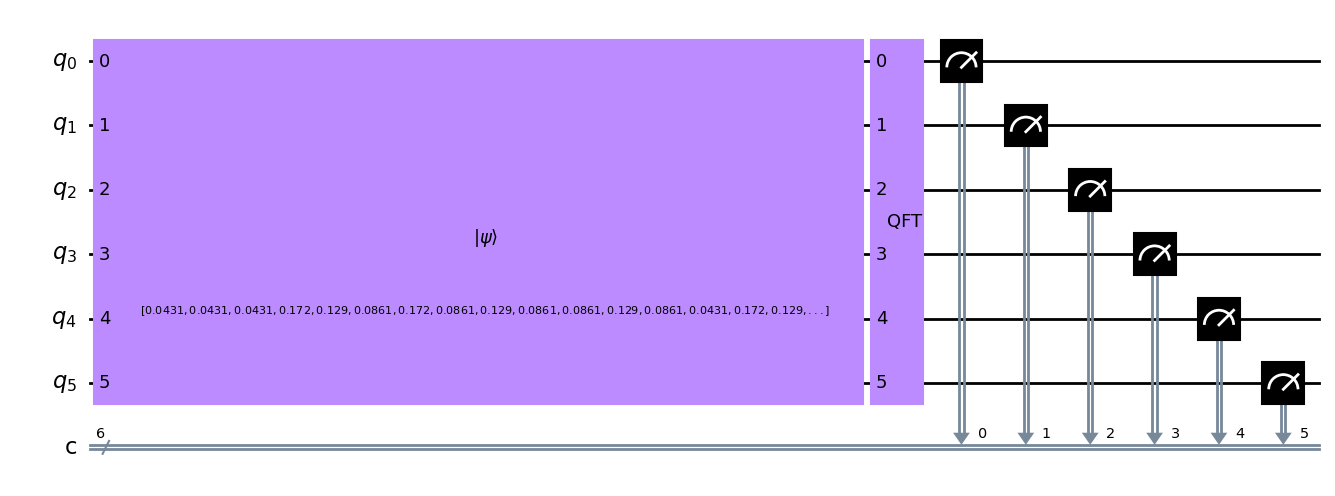

In [2]:
sequence = "AAATGCTCGCCGCATGCTCTGATGTAGTAGTCCCATGCTTTTGCTATGCTATGCTACAGTACTG"

conversion = {"A": 1, "C": 2, "G": 3, "T": 4}

numeric_sequence = [conversion[i] for i in sequence]
alpha = numeric_sequence

beta = alpha #- np.mean(alpha)

beta = beta/np.linalg.norm(beta)
q = QuantumRegister(6,'q') 
c = ClassicalRegister(6,'c') 
qc = QuantumCircuit(q,c)
qc.initialize(beta)
qft = QFT(num_qubits=6, do_swaps=True).to_gate()
qc.append(qft, qargs=[0, 1, 2, 3, 4, 5])
qc.measure(range(6), range(6))
#qc.draw('mpl').savefig('/home/jovyan/My_Notebooks/Images/qTest_2_0.png')
qc.draw('mpl')

In [3]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=128)
result = job.result()

In [4]:
result = job.result()
print(result.get_counts(qc))

{'000111': 1, '000001': 1, '000101': 1, '110000': 2, '111000': 1, '000110': 1, '111110': 1, '010000': 2, '101000': 3, '011000': 5, '000000': 110}


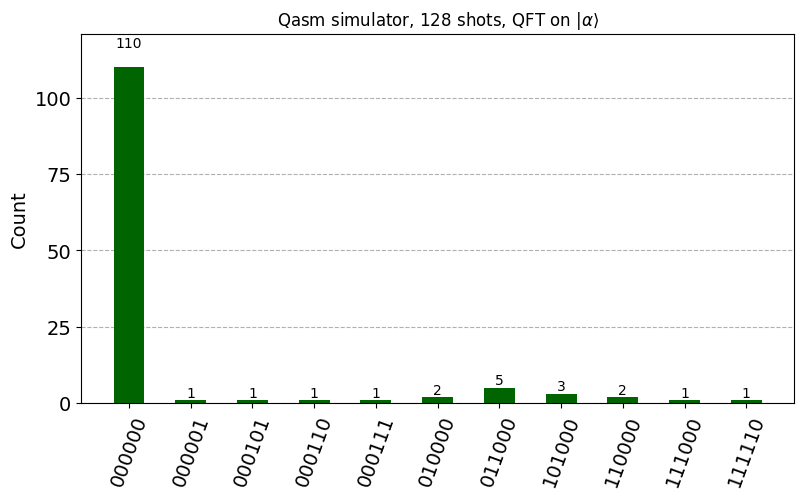

In [5]:
plot_histogram(result.get_counts(qc), color="darkgreen", title=r"Qasm simulator, 128 shots, QFT on $|\alpha\rightangle$", figsize=(9.2, 4.8))

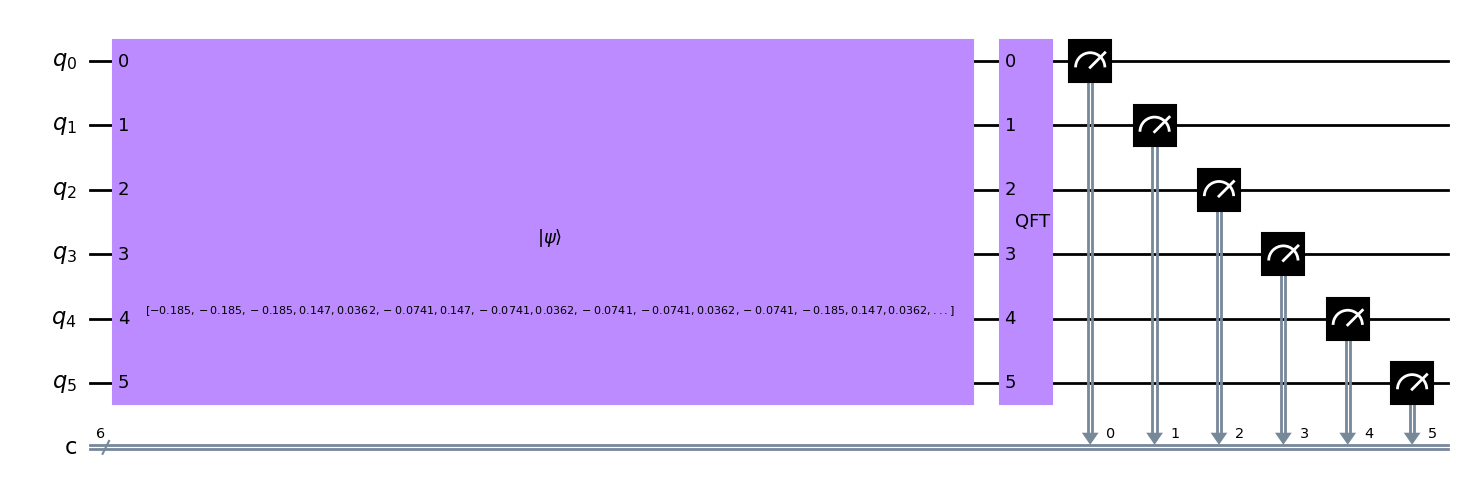

In [16]:
sequence = "AAATGCTCGCCGCATGCTCTGATGTAGTAGTCCCATGCTTTTGCTATGCTATGCTACAGTACTG"

conversion = {"A": 1, "C": 2, "G": 3, "T": 4}

numeric_sequence = [conversion[i] for i in sequence]
alpha = numeric_sequence

beta = alpha - np.mean(alpha)

beta = beta/np.linalg.norm(beta)
q = QuantumRegister(6,'q') 
c = ClassicalRegister(6,'c') 
qc = QuantumCircuit(q,c)
qc.initialize(beta)
qft = QFT(num_qubits=6, do_swaps=True).to_gate()
qc.append(qft, qargs=[0, 1, 2, 3, 4, 5])
qc.measure(range(6), range(6))
#qc.draw('mpl').savefig('/home/jovyan/My_Notebooks/Images/qTest_2_0.png')
qc.draw('mpl')

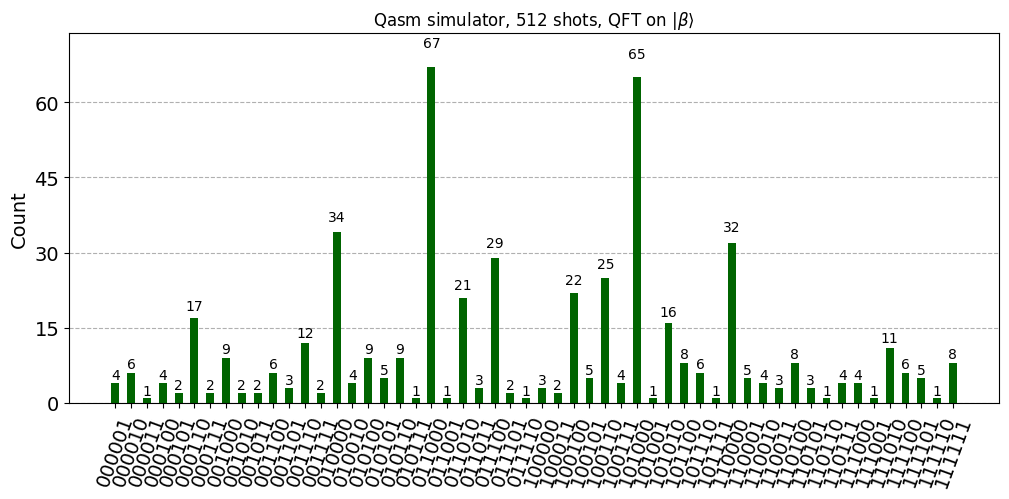

In [18]:
simulator = Aer.get_backend('qasm_simulator')
job2 = execute(qc, simulator, shots=512)
result2 = job2.result()
plot_histogram(result2.get_counts(qc), color="darkgreen", title=r"Qasm simulator, 512 shots, QFT on $|\beta\rightangle$", figsize=(12, 4.8))